In [189]:
import pandas as pd
import numpy as np
import datetime as dt
import re
import math
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [190]:
pd.set_option('display.max_columns', None)

In [191]:
df = pd.read_csv("./data/train.csv")

C:\Users\Harry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [192]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [193]:
df.drop(labels = ["ID","Name", "SSN", "Month"],axis = 1, inplace =True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [195]:
df["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [196]:
le = LabelEncoder()
label = le.fit_transform(df['Credit_Score'])
df["Credit_Score"] = label

In [170]:
"""
One-Hot Encoding Function
"""

def convert_cat(df, col):
    df_conv = pd.get_dummies(df["Occupation"], prefix= "Occ", drop_first = True)
    df.drop(labels = [col], axis = 1, inplace = True)
    df = pd.concat([df, df_conv], axis = 1)
    return df

In [187]:
"""
Function to remove special characters from String so that we can convert it to numeric value
"""

def string_process(df, col):
    df[col] = df[col].apply(lambda x: "0" if x == "_" else x)
    df[col] = df[col].apply(lambda x: "0" if len(x) == 0 else x)
    df[col] = df[col].apply(lambda x : re.findall("-?\d+", x)[0])
    df[col] = pd.to_numeric(df[col])
    return df

In [ ]:
df = string_process(df, "Age")

In [ ]:
"""
Function to fit Age
"""

def clean_age(df, col):
    median_age_df = df.groupby(["Customer_ID"], as_index = False)[col].median()
    age_array = []
    for i in tqdm(range(len(df))):
        customer_id = df.iloc[i,0]
        median_age = median_age_df[median_age_df["Customer_ID"] == customer_id][col].iloc[0]
        df_age = df.iloc[i,1]
        a = median_age - df_age
        
        if (((median_age - df_age) > 1) or ((median_age - df_age) < -1)):
            age_array.append(median_age)
        else:
            age_array.append(df_age)
    
    df[col] = pd.Series(age_array)
    return df

In [ ]:
df = clean_age(df, "Age")

In [ ]:
"""
Function to fit Occupation
"""

def clean_occupation(df, col):
    min_occ_df = df.groupby(["Customer_ID"], as_index = False)[col].min()
    occ_array = []
    for i in tqdm(range(len(df))):
        customer_id = df.iloc[i,0]
        min_occ = min_occ_df[min_occ_df["Customer_ID"] == customer_id][col].iloc[0]
        df_occ = df.iloc[i,2]
        
        if (df_occ == "_______"):
            occ_array.append(min_occ)
        else:
            occ_array.append(df_occ)
            
    df[col] = pd.Series(occ_array)
    return df

In [ ]:
df = clean_occupation(df, "Occupation")

In [ ]:
df = convert_cat(df, "Occupation")

In [ ]:
df = string_process(df, "Annual_Income")

In [42]:
"""
Function to fit Occupation
"""

def median_method(df, col):
    median_group = df.groupby(["Customer_ID"], as_index = False)[col].median()
    income_array = []
    for i in tqdm(range(len(df))):
        customer_id = df.iloc[i,0]
        median_income = median_annualIncome[median_annualIncome["Customer_ID"] == customer_id][col].iloc[0]
        df_income = df.iloc[i,2]
        
        if (df_income != median_income):
            income_array.append(median_income)
        else:
            income_array.append(df_income)
            
    df[col] = pd.Series(income_array)
    return df

In [15]:
cols = ["Monthly_Inhand_Salary", "Num_Credit_Card", "Interest_Rate"]

In [25]:
a = df.groupby(["Customer_ID"], as_index = False)[cols].median()

In [30]:
a[a["Customer_ID"] == "CUS_0xb891"]["Interest_Rate"].iloc[0]

4.0

In [148]:
"""
Function to fit Occupation
"""

def median_method(df, cols):
    median_group = df.groupby(["Customer_ID"], as_index = False)[cols].median()
    
    data_list = []
    
    for i in tqdm(range(len(df))):
        customer_ID = df.iloc[i,0]
        group = median_group[median_group["Customer_ID"] == customer_ID]
        df_val = df.iloc[i]
        val_array =[]
        for col in (cols):
            group_val = group[col].iloc[0]
            df_val_col = df_val[col]

            if (df_val_col != group_val):
                val_array.append(group_val)
            elif math.isnan(df_val_col):
                val_array.append(median_income)
            else:
                val_array.append(df_val_col)   
                
        data_list.append(val_array)
    
    agg = pd.DataFrame(data_list, columns = cols)
    df.drop(cols, axis = 1, inplace= True)
    df = pd.concat([df,agg], axis = 1)
    return df

In [149]:
len(cols)

3

In [150]:
df = median_method(df, cols)

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [03:49<00:00, 434.87it/s]


In [151]:
df

,Customer_ID,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate
0,CUS_0xd40,23,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0,1824.843333,4.0,3.0
1,CUS_0xd40,23,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0,1824.843333,4.0,3.0
2,CUS_0xd40,-500,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0,1824.843333,4.0,3.0
3,CUS_0xd40,23,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0,1824.843333,4.0,3.0
4,CUS_0xd40,23,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0,1824.843333,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25,Mechanic,39628.99,4,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,1,3359.415833,6.0,7.0
99996,CUS_0x942c,25,Mechanic,39628.99,4,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,1,3359.415833,6.0,7.0
99997,CUS_0x942c,25,Mechanic,39628.99,4,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,1,3359.415833,6.0,7.0
99998,CUS_0x942c,25,Mechanic,39628.99,4,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,2,3359.415833,6.0,7.0


In [173]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,CUS_0xd40,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,CUS_0xd40,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,CUS_0xd40,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,1
99996,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,1
99997,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,1
99998,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,2


In [197]:
df = string_process(df, "Changed_Credit_Limit")

In [198]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,CUS_0xd40,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,CUS_0xd40,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,0,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,CUS_0xd40,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,1
99996,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,1
99997,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,1
99998,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,2


In [ ]:
df = median_method(df, "Monthly_Inhand_Salary")

In [ ]:
df["Num_Bank_Accounts"] = df["Num_Bank_Accounts"].apply(lambda x: 0 if x < 0 else x)

In [ ]:
df = median_method(df, "Num_Bank_Accounts")

In [ ]:
df = median_method(df, "Num_Credit_Card")

In [ ]:
df = median_method(df, "Interest_Rate")

In [ ]:
df = string_process(df, "Num_of_Loan")

In [ ]:
df = median_method(df, "Num_of_Loan")

In [ ]:
df["Delay_from_due_date"] = df["Delay_from_due_date"].apply(lambda x: 0 if x < 0 else x)

In [ ]:
df = median_method(df, "Num_of_Delayed_Payment")

In [ ]:
df[df["Num_of_Delayed_Payment"].isna()]

In [212]:
# To check specific customer
df[df.Customer_ID == "CUS_0xa16e"]

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
168,CUS_0xa16e,41,Media_Manager,10183.015,NaN,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,NaN,6.0,Bad,1672.43,25.951273,10 Years and 1 Months,Yes,37.588073,14.622739235117402,High_spent_Large_value_payments,295.2476462600903,1
169,CUS_0xa16e,41,Media_Manager,10183.015,1074.584583,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,18,6.0,Bad,1672.43,32.385598,10 Years and 2 Months,NM,37.588073,92.36195001929579,Low_spent_Small_value_payments,267.5084354759118,1
170,CUS_0xa16e,41,Media_Manager,10183.015,1074.584583,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,23,6.0,Bad,1672.43,23.731348,10 Years and 3 Months,Yes,37.588073,91.88397193610828,Low_spent_Small_value_payments,267.9864135590994,1
171,CUS_0xa16e,41,Media_Manager,10183.015,1074.584583,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",43,20,6.0,_,1672.43,27.614178,10 Years and 4 Months,Yes,37.588073,46.8104157513052,High_spent_Small_value_payments,283.0599697439025,2
172,CUS_0xa16e,41,Media_Manager,10183.015,1074.584583,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",51,NaN,6.0,Bad,1672.43,32.293490,10 Years and 5 Months,Yes,37.588073,65.83126164076859,!@9#%8,294.03912385443914,1
173,CUS_0xa16e,42,_______,10183.015,1074.584583,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,24,1050.0,Bad,1672.43,25.105403,10 Years and 6 Months,Yes,37.588073,73.89986104079846,Low_spent_Small_value_payments,285.9705244544092,1
174,CUS_0xa16e,42,Media_Manager,10183.015,1074.584583,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",52,21,6.0,_,1672.43,24.713824,10 Years and 7 Months,Yes,37.588073,61.863727578026115,Low_spent_Small_value_payments,298.00665791718154,1
175,CUS_0xa16e,42,Media_Manager,10183.015_,1074.584583,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,21,6.0,Bad,1672.43,36.837029,10 Years and 8 Months,Yes,37.588073,71.12274735436063,Low_spent_Small_value_payments,288.747638140847,1


<AxesSubplot:>

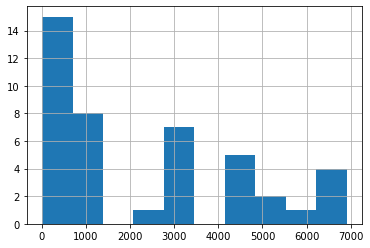

In [199]:
df.groupby(["Changed_Credit_Limit"])["Customer_ID"].count().hist()

In [200]:
a = median_method(df, ["Changed_Credit_Limit"])

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [02:50<00:00, 585.96it/s]


<AxesSubplot:>

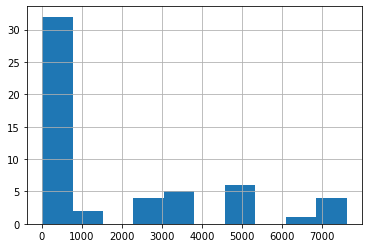

In [201]:
a.groupby(["Changed_Credit_Limit"])["Customer_ID"].count().hist()

In [211]:
a[a["Num_Credit_Inquiries"] > 20]

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Changed_Credit_Limit
173,CUS_0xa16e,42,_______,10183.015,1074.584583,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,24,1050.0,Bad,1672.43,25.105403,10 Years and 6 Months,Yes,37.588073,73.89986104079846,Low_spent_Small_value_payments,285.9705244544092,1,7.0
193,CUS_0xa5f9,34,Mechanic,57983.12,NaN,9,8,31,8,"Payday Loan, Not Specified, Credit-Builder Loa...",53,21,1044.0,Bad,3532.83,37.873642,12 Years and 3 Months,Yes,200.432613,193.87337542933238,High_spent_Medium_value_payments,327.78667784262745,2,7.0
198,CUS_0xa5f9,34,Mechanic,57983.12,4720.926667,9,8,31,8,"Payday Loan, Not Specified, Credit-Builder Loa...",49,21,1936.0,Bad,3532.83,24.631497,12 Years and 8 Months,Yes,200.432613,234.73204010983818,Low_spent_Medium_value_payments,316.9280131621217,2,7.0
234,CUS_0xb681,37,Manager,39641.54,3007.461667,10,8,25,6,"Auto Loan, Student Loan, Payday Loan, Payday L...",61,15,568.0,Bad,2258.73,27.572863,8 Years and 10 Months,Yes,172.382527,198.0421234022212,High_spent_Small_value_payments,190.3215159058186,1,1.0
312,CUS_0x571f,18,Developer,66567.32,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15,1618.0,Standard,233.79,34.456272,24 Years and 3 Months,No,37602.000000,251.6474222267431,Low_spent_Small_value_payments,518.1908835490624,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99717,CUS_0xadbd,26,Doctor,35793.97,2799.830833,5,6,8,4,"Personal Loan, Payday Loan, Not Specified, and...",10,11,1361.0,_,82.15,25.363971,23 Years and 4 Months,No,113.833391,131.20794719543542,Low_spent_Medium_value_payments,314.941745,2,9.0
99769,CUS_0xc345,23_,Architect,60015.32,5121.276667,7,679,14,978,"Mortgage Loan, Mortgage Loan, Credit-Builder L...",8,8,310.0,_,1095.15,35.864367,15 Years and 3 Months,Yes,187.008683,241.3136321224612,Low_spent_Large_value_payments,353.805352,2,10.0
99789,CUS_0x62f5,54,Musician,99520.5,8479.375000,3,1,5,-100,"Home Equity Loan, Not Specified, and Debt Cons...",8,8,93.0,_,547.21,32.224773,16 Years and 6 Months,No,196.528591,NaN,High_spent_Large_value_payments,704.73196,0,4.0
99800,CUS_0x1232,16,Developer,14937.49,NaN,8,8,22,7,"Student Loan, Mortgage Loan, Debt Consolidatio...",44,12,2209.0,Bad,3699.44,23.574545,13 Years and 2 Months,Yes,50.960878,97.58693258712627,Low_spent_Small_value_payments,255.731272,2,24.0
